# Import Basic Libaries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df_raw = pd.read_csv('media prediction and its cost.csv')
df = df_raw.copy()

In [3]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [20]:
df.describe().T.applymap('{:,.1f}'.format)

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),"60,428.0",6.5,3.5,0.5,3.8,5.9,8.7,22.9
store_cost(in millions),"60,428.0",2.6,1.5,0.2,1.5,2.4,3.5,9.7
unit_sales(in millions),"60,428.0",3.1,0.8,1.0,3.0,3.0,4.0,6.0
total_children,"60,428.0",2.5,1.5,0.0,1.0,3.0,4.0,5.0
avg_cars_at home(approx),"60,428.0",2.2,1.1,0.0,1.0,2.0,3.0,4.0
num_children_at_home,"60,428.0",0.8,1.3,0.0,0.0,0.0,1.0,5.0
avg_cars_at home(approx).1,"60,428.0",2.2,1.1,0.0,1.0,2.0,3.0,4.0
SRP,"60,428.0",2.1,0.9,0.5,1.4,2.1,2.8,4.0
gross_weight,"60,428.0",13.8,4.6,6.0,9.7,13.6,17.7,21.9
net_weight,"60,428.0",11.8,4.7,3.0,7.7,11.6,16.0,20.8


In [25]:
df.corr().style.background_gradient(cmap='viridis')

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.954685,0.503482,0.083313,0.004498,0.032437,0.004498,0.833478,0.036179,0.032014,0.034293,-0.006134,-0.010630,0.015543,0.010442,0.017886,0.017883,-0.029368,0.019179,0.031459,0.031459,0.030603,-0.004621
store_cost(in millions),0.954685,1.000000,0.480087,0.079058,0.002865,0.027576,0.002865,0.795880,0.034237,0.030257,0.030213,-0.005976,-0.009792,0.017877,0.012884,0.019245,0.019242,-0.027126,0.019252,0.033206,0.033206,0.030929,-0.004162
unit_sales(in millions),0.503482,0.480087,1.000000,0.163188,0.023667,0.066725,0.023667,-0.002358,0.001255,0.001137,0.001599,-0.001129,0.000084,0.031464,0.024857,0.030563,0.030557,-0.057633,0.034996,0.057878,0.057878,0.055885,-0.015015
total_children,0.083313,0.079058,0.163188,1.000000,0.098110,0.394709,0.098110,0.000545,-0.000186,0.000142,0.002794,-0.002824,0.002307,0.000555,0.018526,-0.026926,-0.026923,0.002836,-0.000591,-0.013764,-0.013764,-0.003361,-0.003900
avg_cars_at home(approx),0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,0.003725,-0.004312,-0.007265,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
num_children_at_home,0.032437,0.027576,0.066725,0.394709,0.130841,1.000000,0.130841,-0.000477,-0.002480,-0.002535,0.001380,-0.001818,0.000118,0.006150,0.025008,-0.024624,-0.024617,-0.016873,-0.013750,-0.023680,-0.023680,-0.008918,-0.002549
avg_cars_at home(approx).1,0.004498,0.002865,0.023667,0.098110,1.000000,0.130841,1.000000,-0.007921,0.004588,0.004155,0.003725,-0.004312,-0.007265,-0.015815,-0.017694,-0.007470,-0.007466,-0.002702,0.014001,-0.008982,-0.008982,-0.004138,0.011658
SRP,0.833478,0.795880,-0.002358,0.000545,-0.007921,-0.000477,-0.007921,1.000000,0.043332,0.038639,0.042013,-0.005527,-0.011951,0.001663,-0.000505,0.004375,0.004374,-0.000014,0.002031,0.002811,0.002811,0.003998,0.002082
gross_weight,0.036179,0.034237,0.001255,-0.000186,0.004588,-0.002480,0.004588,0.043332,1.000000,0.988903,0.052340,-0.033883,-0.011754,-0.005254,-0.004749,-0.004195,-0.004195,0.001933,0.002293,0.001944,0.001944,0.003109,0.001281
net_weight,0.032014,0.030257,0.001137,0.000142,0.004155,-0.002535,0.004155,0.038639,0.988903,1.000000,0.054580,-0.036211,-0.014394,-0.004374,-0.003723,-0.003843,-0.003842,0.001816,0.002551,0.002656,0.002656,0.002579,0.001343


<AxesSubplot:>

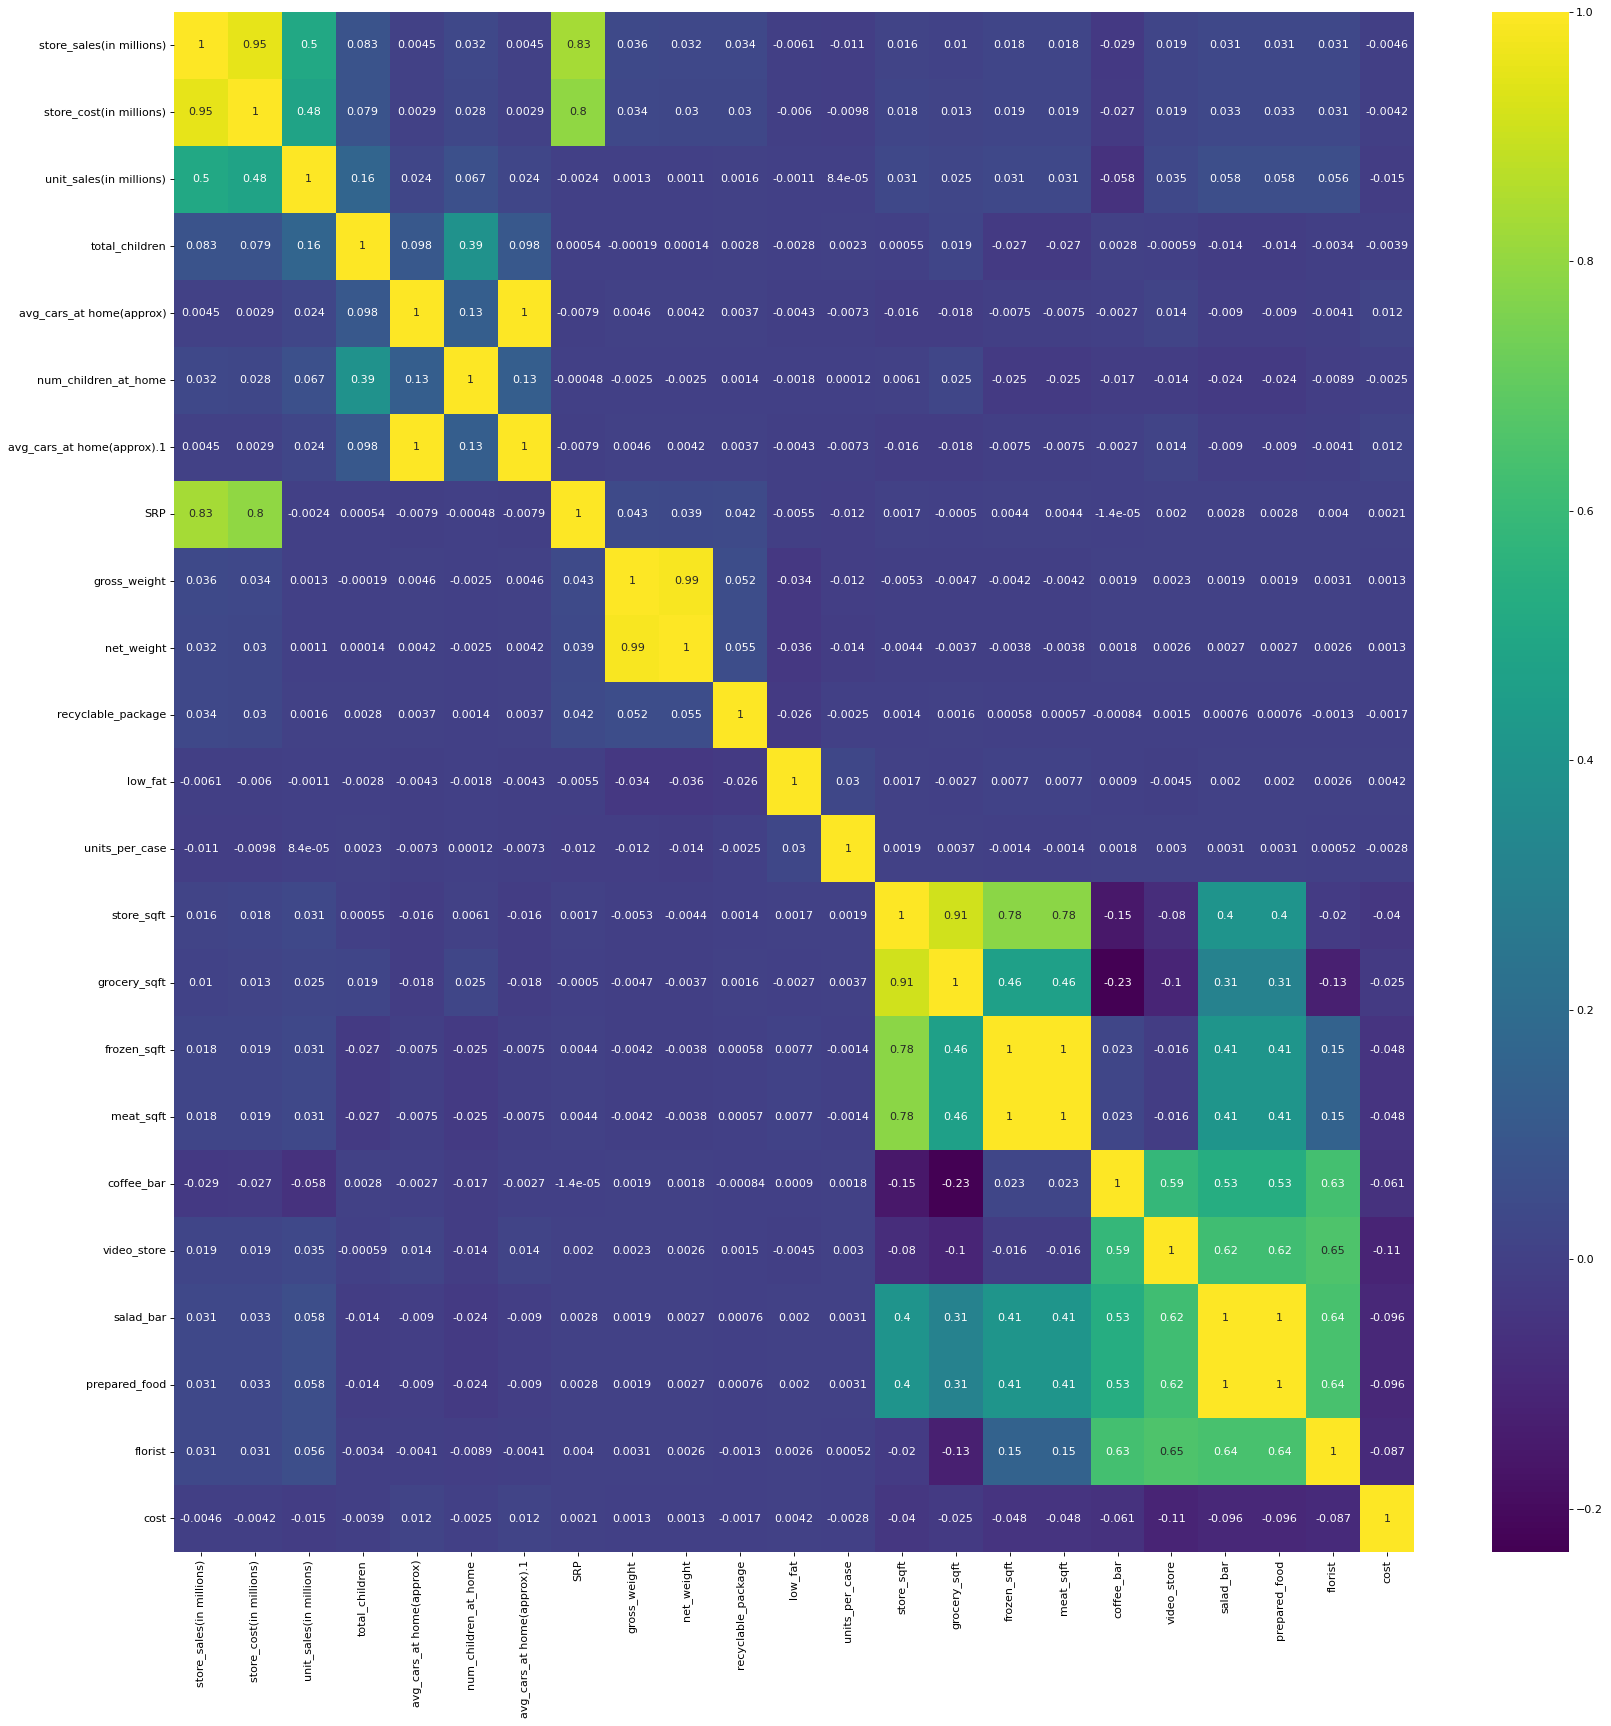

In [27]:
plt.figure(figsize=(25,25), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [29]:
df.head(3).T

,0,1,2
food_category,Breakfast Foods,Breakfast Foods,Breakfast Foods
food_department,Frozen Foods,Frozen Foods,Frozen Foods
food_family,Food,Food,Food
store_sales(in millions),7.36,5.52,3.68
store_cost(in millions),2.7232,2.5944,1.3616
unit_sales(in millions),4.0,3.0,2.0
promotion_name,Bag Stuffers,Cash Register Lottery,High Roller Savings
sales_country,USA,USA,USA
marital_status,M,M,S
gender,F,M,F


In [31]:
num_cols = [col for col in df.columns if df[col].dtypes!='object']
cat_cols = [col for col in df.columns if df[col].dtypes=='object']

df_numeric = df[num_cols]
df_categorical = df[cat_cols]

In [32]:
num_cols

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [33]:
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [36]:
df_numeric.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.70,17.70,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.70,17.70,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.70,17.70,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16
3,3.68,1.1776,2.0,2.0,2.0,2.0,2.0,1.84,19.70,17.70,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78
4,4.08,1.4280,3.0,0.0,2.0,0.0,2.0,1.36,7.12,5.11,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79


In [37]:
df_categorical.head()

,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,Breakfast Foods,Frozen Foods,Food,Bag Stuffers,USA,M,F,Partial High School,Normal,Skilled Manual,Y,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,M,Bachelors Degree,Silver,Professional,Y,$50K - $70K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,Breakfast Foods,Frozen Foods,Food,High Roller Savings,USA,S,F,Partial High School,Normal,Manual,N,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
3,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,F,High School Degree,Bronze,Manual,Y,$30K - $50K,Carrington,Deluxe Supermarket,Salem,OR,In-Store Coupon
4,Breakfast Foods,Frozen Foods,Food,Double Down Sale,USA,M,M,Partial High School,Bronze,Skilled Manual,N,$30K - $50K,Golden,Deluxe Supermarket,Salem,OR,Radio


In [82]:
col_name_inf_10 = []
col_name_sup_10 = []
for col in cat_cols:
    if len(df[col].unique())<=10:
        col_name_inf_10.append(col)
        print(col ,':', len(df_categorical[col].unique()))
    else:
        col_name_sup_10.append(col)
print('\n')
print('Columns Nama with less than 10 Categorical variable :\n\t',col_name_inf_10,'\n')
print('Columns Name with more than 10 Categorical variable :\n\t', col_name_sup_10)

food_family : 3
sales_country : 3
marital_status : 2
gender : 2
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg. yearly_income : 8
store_type : 5
store_state : 10


Columns Nama with less than 10 Categorical variable :
	 ['food_family', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'store_type', 'store_state'] 

Columns Name with more than 10 Categorical variable :
	 ['food_category', 'food_department', 'promotion_name', 'brand_name', 'store_city', 'media_type']


In [61]:
df[['food_category', 'food_department', 'promotion_name', 'brand_name', 'store_city', 'media_type']]

,food_category,food_department,promotion_name,brand_name,store_city,media_type
0,Breakfast Foods,Frozen Foods,Bag Stuffers,Carrington,Salem,"Daily Paper, Radio"
1,Breakfast Foods,Frozen Foods,Cash Register Lottery,Carrington,Salem,"Daily Paper, Radio"
2,Breakfast Foods,Frozen Foods,High Roller Savings,Carrington,Salem,"Daily Paper, Radio"
3,Breakfast Foods,Frozen Foods,Cash Register Lottery,Carrington,Salem,In-Store Coupon
4,Breakfast Foods,Frozen Foods,Double Down Sale,Golden,Salem,Radio
...,...,...,...,...,...,...
60423,Specialty,Carousel,You Save Days,ADJ,San Francisco,In-Store Coupon
60424,Specialty,Carousel,Price Cutters,Symphony,San Francisco,Sunday Paper
60425,Specialty,Carousel,Weekend Markdown,ADJ,San Francisco,"Sunday Paper, Radio, TV"
60426,Specialty,Carousel,Sales Days,ADJ,Victoria,Sunday Paper


In [83]:
list_drop1 = ['food_category', 'food_department', 'promotion_name', 'brand_name', 'store_city', 'media_type']
df = df.drop(list_drop1, axis=1)

In [84]:
df.head()

,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),sales_country,marital_status,gender,total_children,education,member_card,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,Food,7.36,2.7232,4.0,USA,M,F,1.0,Partial High School,Normal,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,Food,5.52,2.5944,3.0,USA,M,M,0.0,Bachelors Degree,Silver,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,Food,3.68,1.3616,2.0,USA,S,F,4.0,Partial High School,Normal,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16
3,Food,3.68,1.1776,2.0,USA,M,F,2.0,High School Degree,Bronze,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,95.78
4,Food,4.08,1.4280,3.0,USA,M,M,0.0,Partial High School,Bronze,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,50.79


In [85]:
num_cols = [col for col in df.columns if df[col].dtypes!='object']
cat_cols = [col for col in df.columns if df[col].dtypes=='object']

df_numeric = df[num_cols]
df_categorical = df[cat_cols]

In [91]:
df_cat_encoder = pd.get_dummies(df_categorical, drop_first=True)

In [92]:
df_final = pd.concat([df_numeric, df_cat_encoder], axis=1)
df_final.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_type_Supermarket,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.70,17.70,...,0,0,0,0,0,1,0,0,0,0
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.70,17.70,...,0,0,0,0,0,1,0,0,0,0
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.70,17.70,...,0,0,0,0,0,1,0,0,0,0
3,3.68,1.1776,2.0,2.0,2.0,2.0,2.0,1.84,19.70,17.70,...,0,0,0,0,0,1,0,0,0,0
4,4.08,1.4280,3.0,0.0,2.0,0.0,2.0,1.36,7.12,5.11,...,0,0,0,0,0,1,0,0,0,0


In [95]:
X = df_final.drop('cost', axis=True)
y = df_final['cost']

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [98]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [103]:
X_train.shape, X_test.shape

((42299, 60), (18129, 60))

In [102]:
y_train.shape, y_test.shape

((42299,), (18129,))

# Machine Learning Model

In [108]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error , roc_auc_score

## Model SVR

In [125]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_svr),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_svr),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_svr)),2)}")

MAE: 24.31
MSE: 871.89
RMSE: 29.53


## Model DecisionTreeRegressor

In [116]:
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)
y_pred_DTR = model_DTR.predict(X_test)


# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_DTR),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_DTR),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_DTR)),2)}")

MAE: 27.79
MSE: 1425.39
RMSE: 37.75


## Model LinearRegression

In [118]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_LR),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_LR),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_LR)),2)}")

MAE: 25.24
MSE: 853.32
RMSE: 29.21


## Model KNeighborsRegressor

In [119]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_knn),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_knn),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_knn)),2)}")

MAE: 23.13
MSE: 816.65
RMSE: 28.58


## Model GradientBoostingRegressor

In [121]:
model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, y_train)
y_pred_GBR = model_GBR.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_GBR),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_GBR),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_GBR)),2)}")

MAE: 25.1
MSE: 843.99
RMSE: 29.05


## Model BaggingRegressor

In [123]:
model_BA = BaggingRegressor()
model_BA.fit(X_train, y_train)
y_pred_BA = model_BA.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_BA),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_BA),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_BA)),2)}")

MAE: 24.23
MSE: 842.44
RMSE: 29.02


## Model RandomForestRegressor

In [124]:
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)
y_pred_RFR = model_RFR.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_RFR),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_RFR),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_RFR)),2)}")

MAE: 23.56
MSE: 770.05
RMSE: 27.75


In [189]:
list_model = ['SVR', 'DecisionTreeRegressor', 'LinearRegression', 'KNeighborsRegressor'
              , 'GradientBoostingRegressor','BaggingRegressor','RandomForestRegressor']

list_predict = [y_pred_svr, y_pred_DTR, y_pred_LR, y_pred_knn, y_pred_GBR, y_pred_BA, y_pred_RFR]

MAE  = []
RMSE = []

for y_pred in list_predict:
    MAE.append(mean_absolute_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

results = pd.DataFrame(np.array([MAE, RMSE])).T
results.columns = ['MAE','RMSE']
results.index= list_model
results

,MAE,RMSE
SVR,24.307674,29.527860
DecisionTreeRegressor,27.791906,37.754378
LinearRegression,25.241395,29.211623
KNeighborsRegressor,23.126621,28.577102
GradientBoostingRegressor,25.096028,29.051585
BaggingRegressor,24.230501,29.024744
RandomForestRegressor,23.557828,27.749693


<AxesSubplot:>

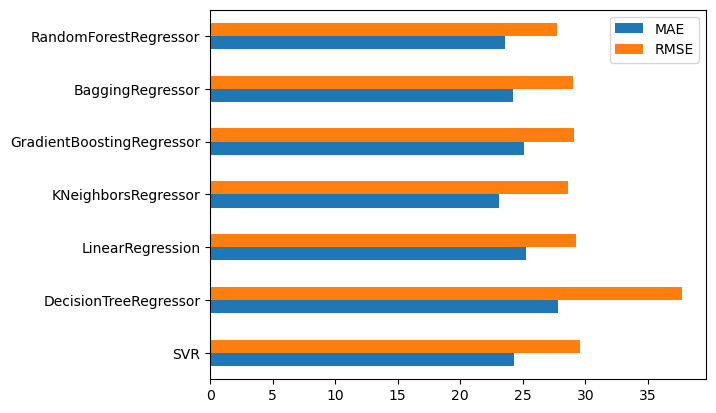

In [191]:
results.plot(kind='barh')

## Model KNN with beste Hyperparameter

### KNN

In [194]:
param = {
    'n_neighbors': range(1, 15, 2),
    'weights': ['uniform', 'distance'],
}
knn = KNeighborsRegressor()
grid = GridSearchCV(estimator=knn, param_grid=param ,cv=5, verbose=1)
results = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (results.best_score_, results.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best: 0.114902 using {'n_neighbors': 13, 'weights': 'distance'}


In [195]:
model_knn_tuned = KNeighborsRegressor(n_neighbors=13, weights='distance')
model_knn_tuned.fit(X_train, y_train)
y_pred_knn_tuned = model_knn_tuned.predict(X_test)

# Evaluate the Model
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_knn_tuned),2)}")
print(f"MSE: {round(mean_squared_error(y_test, y_pred_knn_tuned),2)}")
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_knn_tuned)),2)}")

MAE: 23.38
MSE: 781.89
RMSE: 27.96
